<a href="https://colab.research.google.com/github/jotadram6/EACD-02-ESTADISTICA/blob/master/Sesi%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso Estadística y Análisis exploratorio
Profesor: José David Ruiz Álvarez

Correo: josed.ruiz@udea.edu.co

## Sesión 2

### Test estadísticos:


1.   Distribuciones notables
2.   Funciones de variables aleatorias
3.   Covarianza
4.   Propagación de errores
5.   Test estadísticos
6.   Test de $\chi^{2}$
7.   Verosimilitud


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuciones notables
## Binomial: 

$$f(n;N,p) = \frac{N!}{n!(N-n)!}p^{n}(1-p)^{N-n}$$

n intentos exitosos, N intentos totales, p probabilidad de acierto.

## Poisson

$$f(n;\nu)=\frac{\nu^{n}}{n!}e^{-\nu}$$

n observaciones de $\nu$ espearados. 

## Uniforme

$$f(x;\alpha,\beta)=
\left\{
	\begin{array}{ll}
		\frac{1}{\beta-\alpha}  & \mbox{si } \alpha \leq x \leq \beta \\
		0 & \mbox{si } x < \alpha\; ;\; x > \beta
	\end{array}
\right. $$

$\alpha$ límite inferior y $\beta$ límite superior.

## Exponencial

$$f(x;\tau)=\frac{1}{\tau}e^{-x/\tau}$$

## Gaussiana

$$f(x;\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

## Chi cuadrado

$$f(z;n)=\frac{1}{2^{n/2}\Gamma(n/2)}z^{n/2-1}e^{-z/2}$$

n grados de libertad.

### Ejemplo con distribución uniforme

In [2]:
Uniforme = np.random.uniform(0,100,100000)

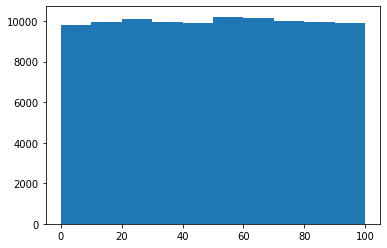

In [3]:
HistoUniforme = plt.hist(Uniforme)

In [10]:
def SomeStats(MyArray,PrintIt=False):
  Mediana=np.median(MyArray)
  Media=np.mean(MyArray)
  Varianza=np.var(MyArray)
  STD=np.std(MyArray)
  if PrintIt:
    print("Mediana=", Mediana)
    print("Media=", Media)
    print("Varianza=", Varianza, "Raíz cuadrada de la varianza=", np.sqrt(Varianza))
    print("Desviación estándar", STD)
  return Mediana,Media,Varianza,STD

In [11]:
SomeStats(Uniforme,PrintIt=True)

Mediana= 50.21533751518241
Media= 50.03964129121106
Varianza= 828.2662469592926 Raíz cuadrada de la varianza= 28.779615128755502
Desviación estándar 28.779615128755502


(50.21533751518241, 50.03964129121106, 828.2662469592926, 28.779615128755502)

In [12]:
#Ejemplo de muestreo
Sample1 = np.random.uniform(0,100,100)
Sample2 = np.random.uniform(0,100,1000)
Sample3 = np.random.uniform(0,100,10000)
Sample4 = np.random.uniform(0,100,100000)
Sample5 = np.random.uniform(0,100,1000000)

In [16]:
Medias=[SomeStats(Sample1)[1],SomeStats(Sample2)[1],SomeStats(Sample3)[1],SomeStats(Sample4)[1],SomeStats(Sample5)[1]]
DesvStds=[SomeStats(Sample1)[3],SomeStats(Sample2)[3],SomeStats(Sample3)[3],SomeStats(Sample4)[3],SomeStats(Sample5)[3]]

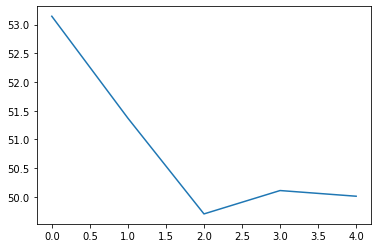

In [17]:
plt.plot(Medias)

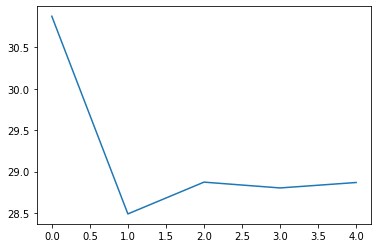

In [18]:
plt.plot(DesvStds)

### Otros ejemplos: Exponencial, chi2, normal, poisson

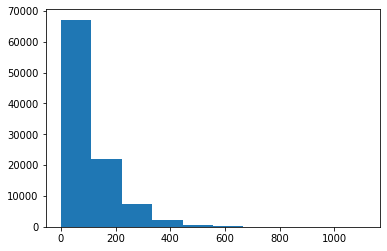

In [19]:
Expo = np.random.exponential(100,100000)
HistoExpo = plt.hist(Expo)

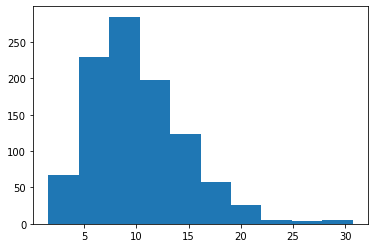

In [22]:
Chi2 = np.random.chisquare(10,1000)
HistoChi2 = plt.hist(Chi2)

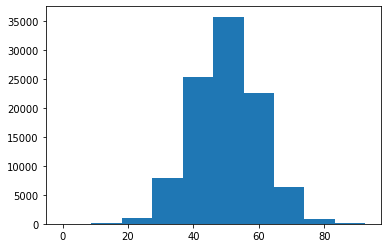

In [23]:
Norm = np.random.normal(50,10,100000)
HistoNorm = plt.hist(Norm)

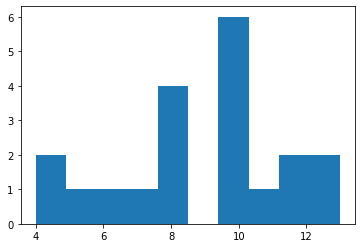

In [26]:
Poi = np.random.poisson(10,20)
HistoPoi = plt.hist(Poi)

## Ejercicio 1

Utilice el ejemplo de muestreo para encontrar la mediana, media y varianza de las distribuciones:

1. Esponencial: $\tau=100$
2. Chi2: $n=8$
3. Normal: $\mu=50$, $\sigma=15$
4. Poisson: $\nu=123$

### Teorema del límite central
La suma de n variables aleatorias independientes $x_{i}$ con $\sigma_{i}^{2}$ y $\mu_{i}$ es una variable aleatoria de distribución normal.

## Ejercicio 2

Tome n=10,20,100,200 variables aleatorias. Todas ellas distribuidas con una distribución distinta a la normal. Demuestre que la suma de todas ellas para cada n se ajusta al teorema del límite central.

## Funciones de variables aleatorias

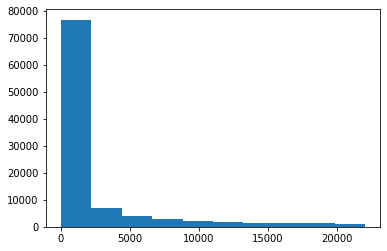

In [52]:
Uni = np.random.uniform(0,10,100000)
HistoExpdeUni = plt.hist(np.exp(Uni))

## Ejercicio 3

Utilice el ejemplo de muestreo para encontrar la media y varianza de la exponencial de una variable distribuída de forma uniforme, como en la celda anterior.

## Covarianza

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  This is separate from the ipykernel package so we can avoid doing imports until


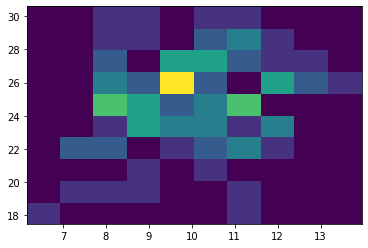

In [49]:
mean = (10, 25)
cov = [[2, 0], [0, 5]]
Norm2D = np.random.multivariate_normal(mean, cov, 100)
HistoNorm = plt.hist2d(Norm2D.take(indices=0,axis=1),Norm2D.take(indices=1,axis=1))